In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 读取三个结果文件
rand_df = pd.read_csv("rand_results.csv")
lru_df = pd.read_csv("lru_results.csv")
clock_df = pd.read_csv("clock_results.csv")

# 2. 合并
df = pd.concat([rand_df, lru_df, clock_df], ignore_index=True)

# 确认数据格式
display(df.head())



,trace,frames,algorithm,page_faults,disk_reads,disk_writes
0,bzip.trace,4,rand,131294,37607,0.1313
1,bzip.trace,8,rand,43996,16273,0.0440
2,bzip.trace,16,rand,4572,1506,0.0046
3,bzip.trace,32,rand,2574,829,0.0026
4,bzip.trace,64,rand,1606,534,0.0016


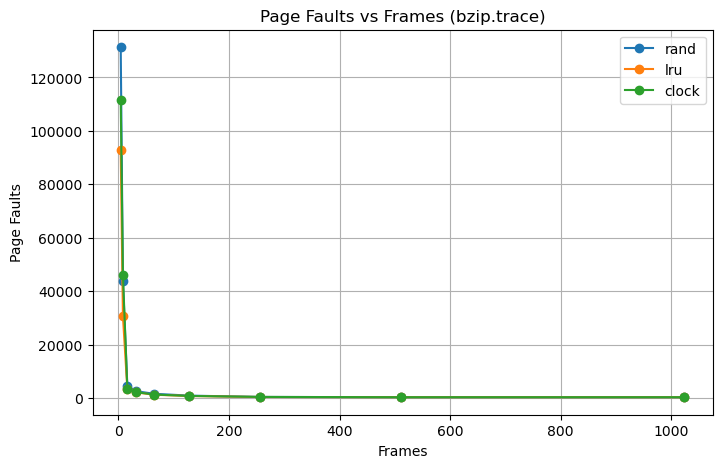

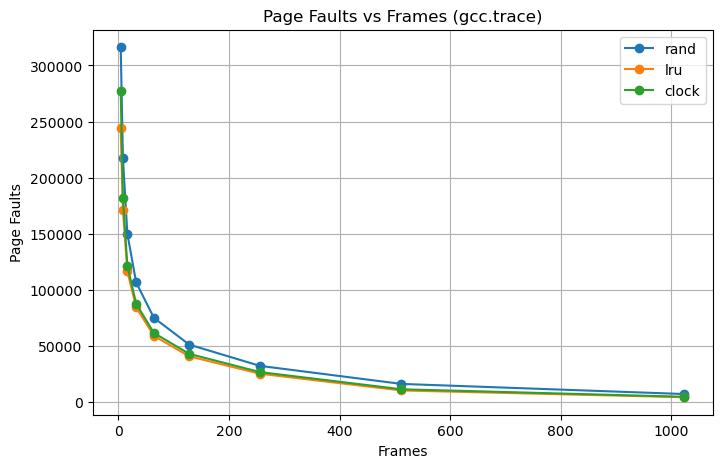

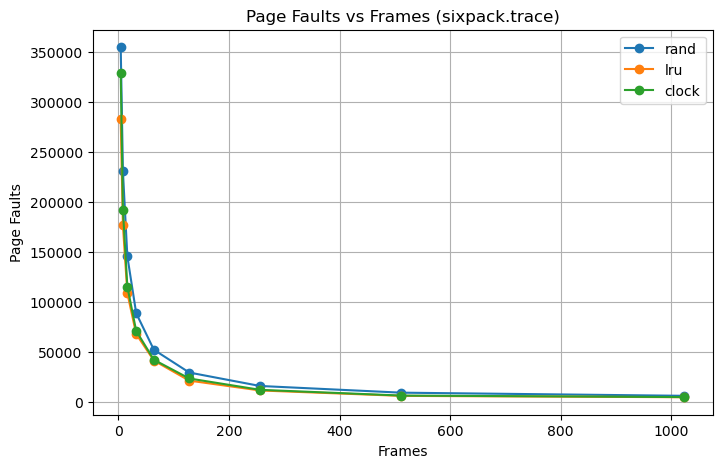

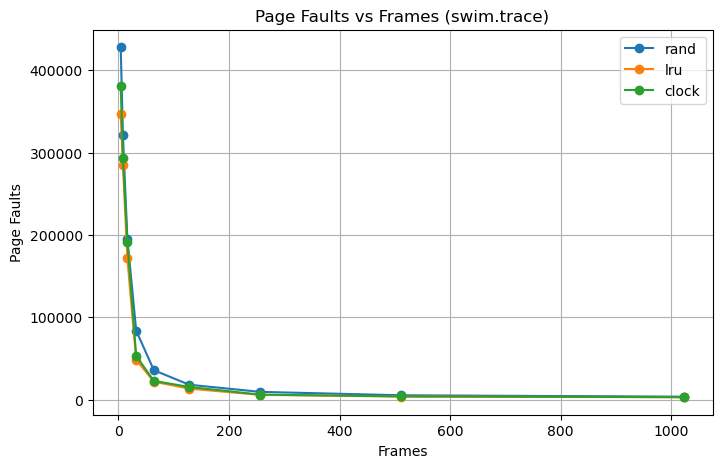

In [15]:
# 3. 定义绘图函数
def plot_metric(metric, ylabel):
    traces = df["trace"].unique()
    for trace in traces:
        subset = df[df["trace"] == trace]
        plt.figure(figsize=(8, 5))
        
        for algo in subset["algorithm"].unique():
            algo_data = subset[subset["algorithm"] == algo]
            plt.plot(algo_data["frames"], algo_data[metric], marker="o", label=algo)
        
        plt.title(f"{ylabel} vs Frames ({trace})")
        plt.xlabel("Frames")
        plt.ylabel(ylabel)
        plt.legend()
        plt.grid(True)
        plt.show()

# 4. 画三类指标
plot_metric("page_faults", "Page Faults")



In [4]:
import matplotlib.pyplot as plt

def plot_metric(metric, ylabel):
    traces = df["trace"].unique()
    n_cols = 2
    n_rows = (len(traces) + n_cols - 1) // n_cols  # 自动算行数

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
    axes = axes.flatten()  # 拉平，方便索引

    for i, trace in enumerate(traces):
        subset = df[df["trace"] == trace]

        for algo in subset["algorithm"].unique():
            algo_data = subset[subset["algorithm"] == algo]
            axes[i].plot(algo_data["frames"], algo_data[metric], marker="o", label=algo)

        axes[i].set_title(f"{ylabel} vs Frames ({trace})")
        axes[i].set_xlabel("Frames")
        axes[i].set_ylabel(ylabel)
        axes[i].legend()
        axes[i].grid(True)

    # 删除多余 subplot（如果 trace 数是奇数）
    if len(traces) % n_cols != 0:
        for j in range(len(traces), len(axes)):
            fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


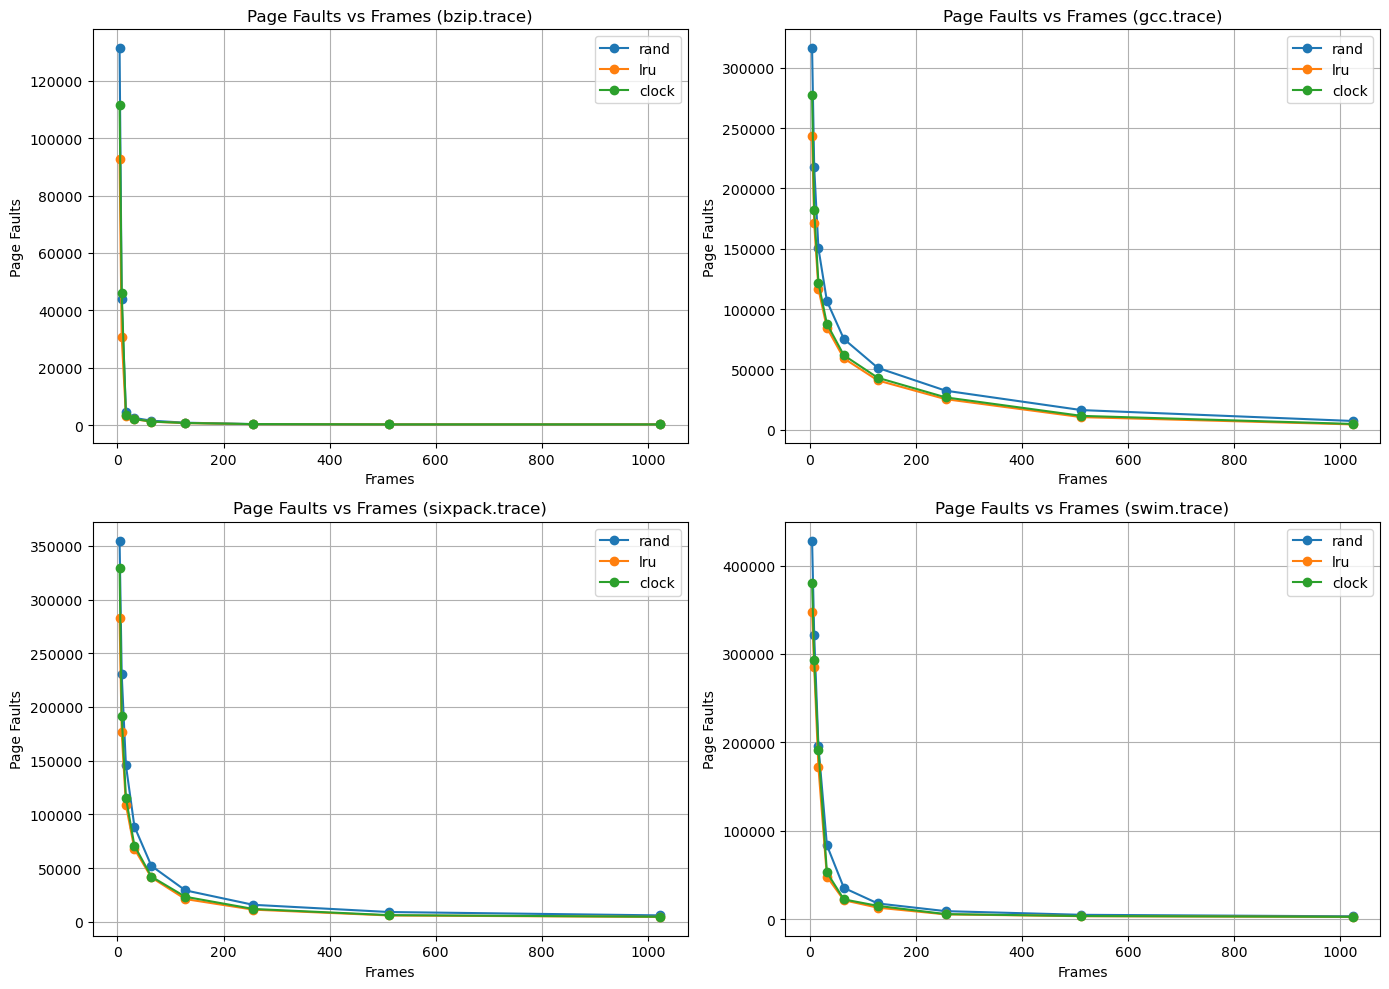

In [5]:
plot_metric("page_faults", "Page Faults")

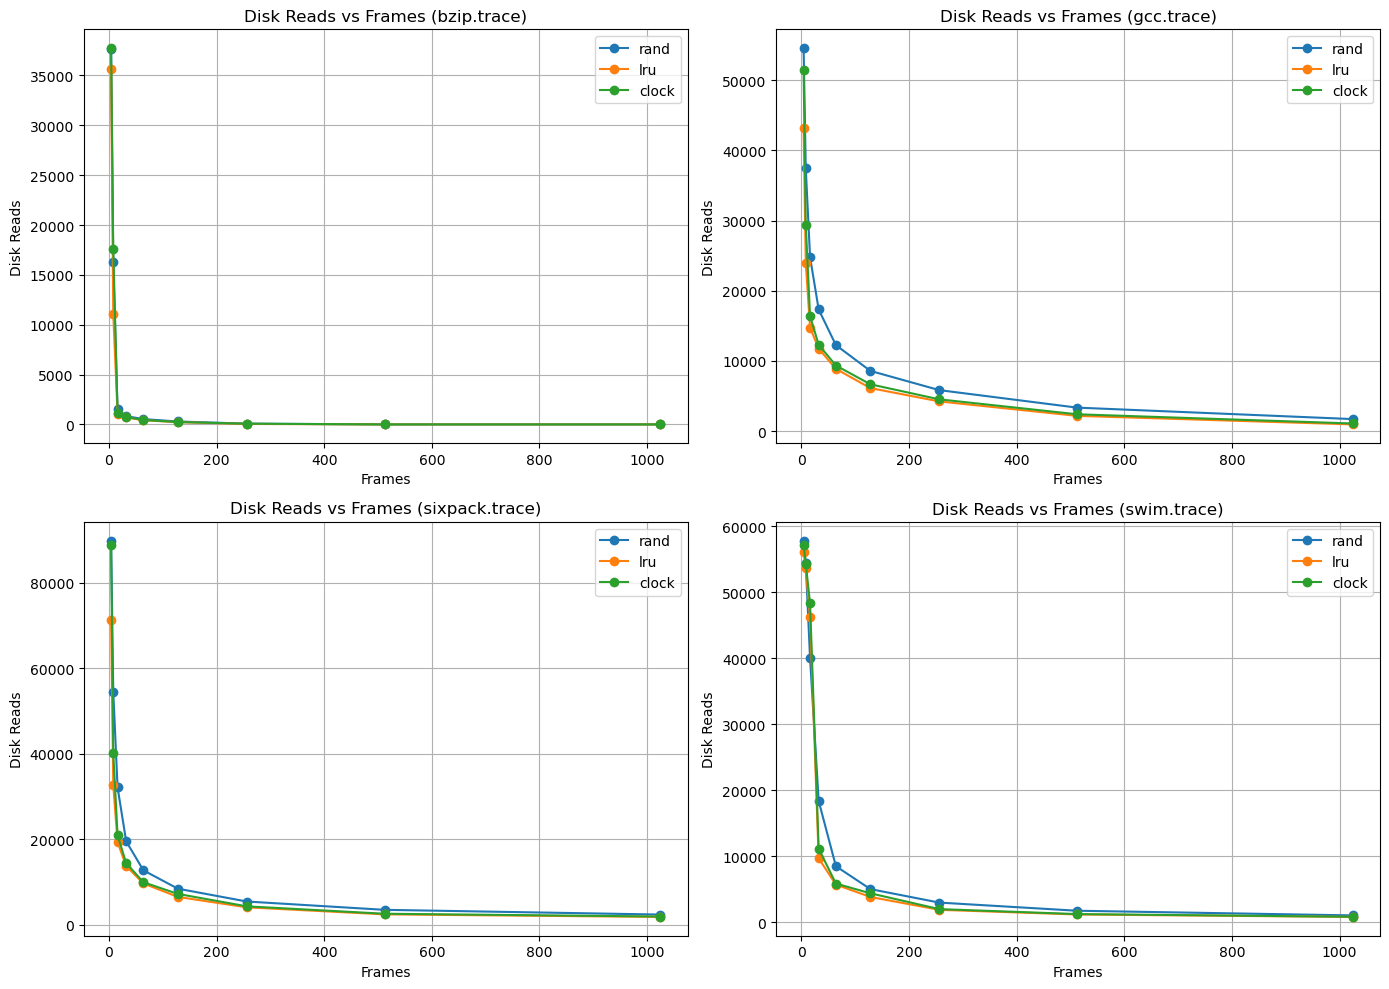

In [6]:
plot_metric("disk_reads", "Disk Reads")


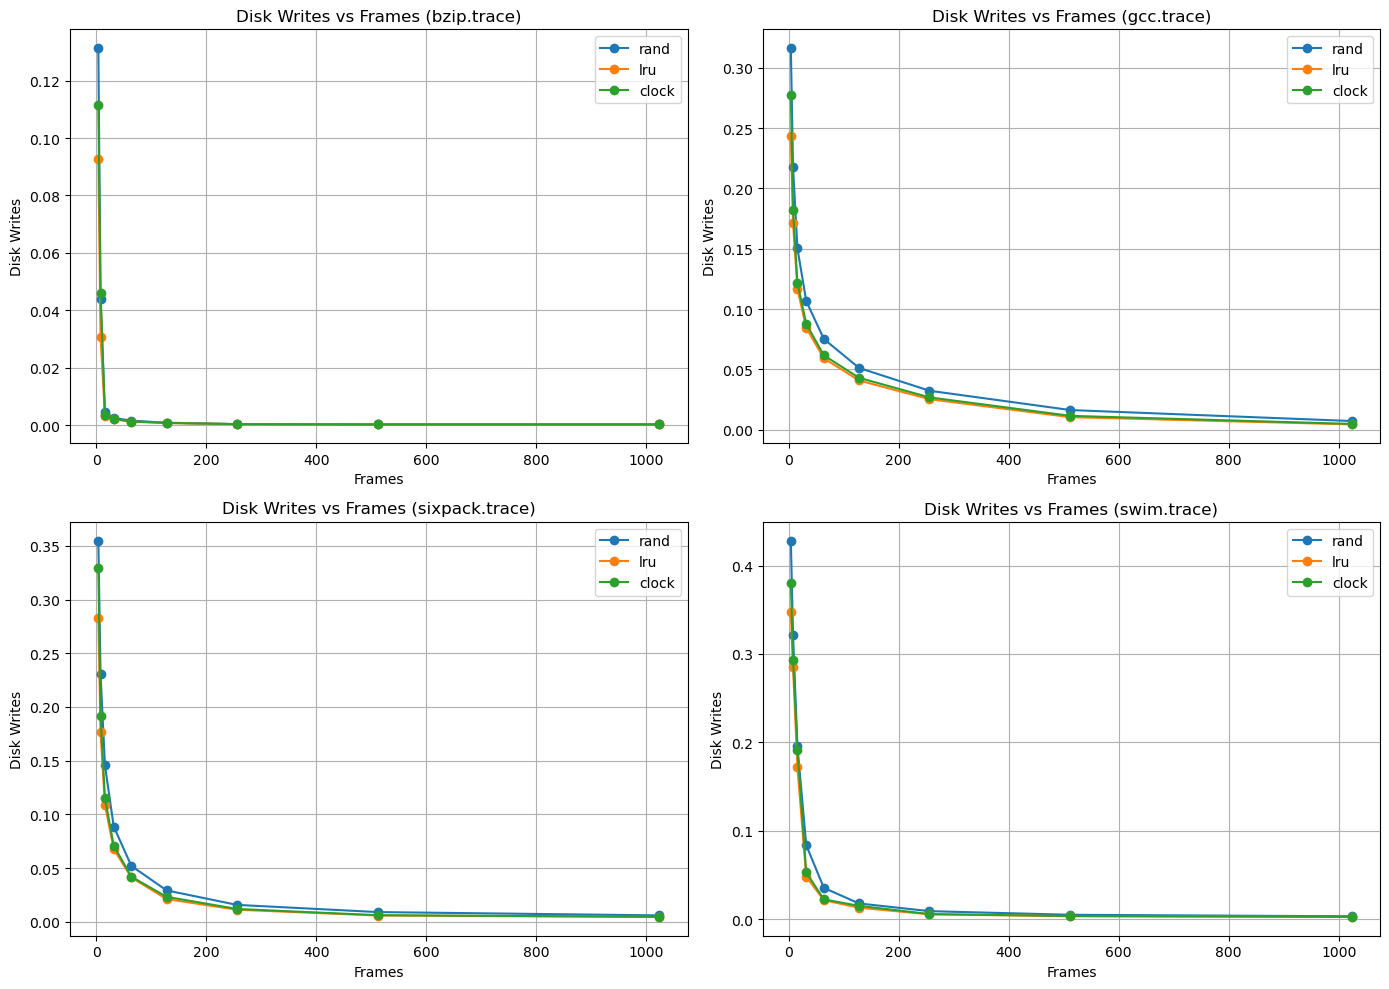

In [7]:
plot_metric("disk_writes", "Disk Writes")